In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [32]:
df = pd.read_csv("TSLA.csv")
df = df['Open'].values
df = df.reshape(-1, 1)
df.shape
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [36]:
df = pd.read_csv("TSLA.csv")

In [37]:
print(df.to_string())

            Date       Open       High        Low      Close  Adj Close     Volume
0     2010-07-01   5.000000   5.184000   4.054000   4.392000   4.392000   41094000
1     2010-07-02   4.600000   4.620000   3.742000   3.840000   3.840000   25699000
2     2010-07-06   4.000000   4.000000   3.166000   3.222000   3.222000   34334500
3     2010-07-07   3.280000   3.326000   2.996000   3.160000   3.160000   34608500
4     2010-07-08   3.228000   3.504000   3.114000   3.492000   3.492000   38557000
5     2010-07-09   3.516000   3.580000   3.310000   3.480000   3.480000   20253000
6     2010-07-12   3.590000   3.614000   3.400000   3.410000   3.410000   11012500
7     2010-07-13   3.478000   3.728000   3.380000   3.628000   3.628000   13400500
8     2010-07-14   3.588000   4.030000   3.552000   3.968000   3.968000   20976000
9     2010-07-15   3.988000   4.300000   3.800000   3.978000   3.978000   18699000
10    2010-07-16   4.140000   4.260000   4.010000   4.128000   4.128000   13106500
11  

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.0239104 ],
       [0.01851302],
       [0.01041695],
       [0.00070166],
       [0.        ]])

In [23]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [24]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [25]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [26]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 16s 138ms/step - loss: 0.0196
Epoch 2/50
59/59 [==============================] - 8s 142ms/step - loss: 0.0034
Epoch 3/50
59/59 [==============================] - 8s 142ms/step - loss: 0.0034
Epoch 4/50
59/59 [==============================] - 8s 139ms/step - loss: 0.0030
Epoch 5/50
59/59 [==============================] - 8s 144ms/step - loss: 0.0028
Epoch 6/50
59/59 [==============================] - 9s 148ms/step - loss: 0.0029
Epoch 7/50
59/59 [==============================] - 9s 148ms/step - loss: 0.0028
Epoch 8/50
59/59 [==============================] - 8s 142ms/step - loss: 0.0029
Epoch 9/50
59/59 [==============================] - 9s 145ms/step - loss: 0.0023
Epoch 10/50
59/59 [==============================] - 9s 144ms/step - loss: 0.0022
Epoch 11/50
59/59 [==============================] - 8s 143ms/step - loss: 0.0021
Epoch 12/50
59/59 [==============================] - 9s 145ms/step - loss: 0.0020
Epoch 13/50
59/59 [=====

In [29]:
model = load_model('stock_prediction.h5')

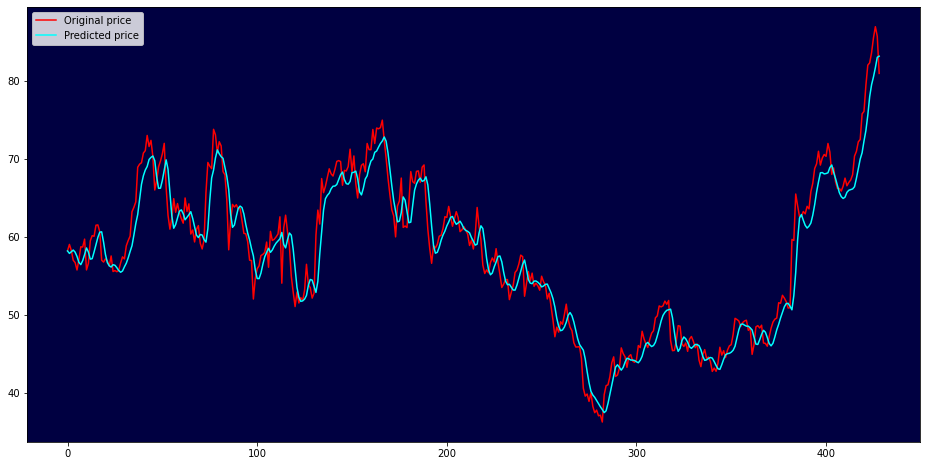

In [30]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()